In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

Once the appropriate libraries have been imported, we are just going to do a simple scatterplot to give us a rough visualisation on what the data looks like. Can we see a relationship between mood (RCADS) and behaviour (SDQ)?

In [137]:
dataset = pd.read_excel('dataset.xlsx')
rcads_sdq_totals_t1 = dataset.filter(items=['rcads_score_anx_dep_t1','sdq_total_t1'])
rcads_sdq_totals_t1.head()

,rcads_score_anx_dep_t1,sdq_total_t1
0,24.0,NaN
1,84.0,NaN
2,NaN,27.0
3,NaN,18.0
4,NaN,18.0


In [138]:
filtered_scores = rcads_sdq_totals_t1.dropna()
filtered_scores.describe()

,rcads_score_anx_dep_t1,sdq_total_t1
count,146.000000,146.000000
mean,57.664384,15.041096
std,25.083386,6.178803
min,6.000000,0.000000
25%,37.000000,11.000000
50%,59.500000,15.000000
75%,77.000000,19.750000
max,124.000000,32.000000


Once the data is tidy and we have filtered everything as appropriate, let's create the scatterplot

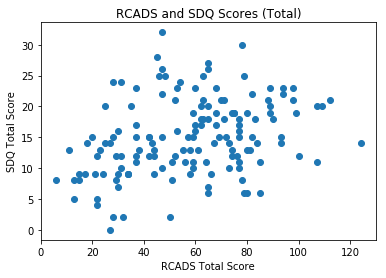

In [139]:
x = filtered_scores['rcads_score_anx_dep_t1']
y = filtered_scores['sdq_total_t1']
plt.scatter(x,y, label='score')
plt.title('RCADS and SDQ Scores (Total)')
plt.xlabel('RCADS Total Score')
plt.ylabel('SDQ Total Score')
plt.show()

Now we have a rough idea of what the dataset looks like, we can go ahead and create our linear regression model. When we create our model, we will find the strength of the relationship as well.

These are the equations I will be using to generate the linear regression function.

<b>Linear Regression Function</b>
y = mx + b where y is the SDQ total score, m is the slope/gradient of the line and b is the y intercept.

In order to find m, I will do the following:
m = r(sy/sx) where r is pearsons correlation coefficient, sy is the standard deviation of y (SDQ Total Score) and sx is the standard deviation of x (RCADS Total Score)

In order to find b, I will do the following:
b = mean(y) - m(mean(x)) where mean(y) is the mean value of y (SDQ Total Score) and m(mean x) is the slope/gradient of the line multiplied by the mean value of x (RCADS Total Score)

<b>Step 1: Find pearson correlation coefficient, r</b>

In [142]:
x_meanx = [] 
y_meany = []
for index, row in filtered_scores.iterrows():
    x_meanx.append(row['rcads_score_anx_dep_t1'] - filtered_scores['rcads_score_anx_dep_t1'].mean())
    y_meany.append(row['sdq_total_t1'] - filtered_scores['sdq_total_t1'].mean())
x_meanx_multiply_y_meany = np.multiply(x_meanx, y_meany)
x_meanx_squared = np.power(x_meanx, 2)
y_meany_squared = np.power(y_meany, 2)
filtered_scores_table = filtered_scores.assign(x_meanx = x_meanx, y_meany = y_meany, x_meanx_multiply_y_meany = x_meanx_multiply_y_meany, x_meanx_sqaured = x_meanx_squared, y_meany_square = y_meany_squared)

In [143]:
filtered_scores_table.head()

,rcads_score_anx_dep_t1,sdq_total_t1,x_meanx,y_meany,x_meanx_multiply_y_meany,x_meanx_sqaured,y_meany_square
59,74.0,12.0,16.335616,-3.041096,-49.678176,266.852364,9.248264
490,65.0,20.0,7.335616,4.958904,36.376619,53.811269,24.590730
534,77.0,15.0,19.335616,-0.041096,-0.794614,373.866063,0.001689
543,77.0,17.0,19.335616,1.958904,37.876619,373.866063,3.837305
568,77.0,16.0,19.335616,0.958904,18.541002,373.866063,0.919497


Now we have everything we need to plug our values into the correlation coefficient equation. Here is what the new collumns mean:
x_meanx = x - mean(x)<br>
y_meany = y - mean(y)<br>
x_meanx_multiply_y_meany = (x - mean(x)) * (y - mean(y))<br>
x_meanx_squared = (x - mean(x))^2<br>
y_meany_squared = (y - mean(y))^2<br>

<b>Remeber that x = RCADS and y = SDQ</b>

In [146]:
top = filtered_scores_table['x_meanx_multiply_y_meany'].sum()
bottom = filtered_scores_table['x_meanx_sqaured'].sum() * filtered_scores_table['y_meany_square'].sum()
bottom_sqrt = math.sqrt(bottom)
r = top/bottom_sqrt
print(r.round(2))

0.33


<b>Step 2: Now that we have the r value, we can work out the gradient/slope of the line</b>

In [152]:
m = r * (filtered_scores_table['sdq_total_t1'].std()/filtered_scores_table['rcads_score_anx_dep_t1'].std())
print(m.round(2))

0.08


<b>Step 3: Now that we have the gradient/slope, we can now work out the y intercept</b>

In [155]:
b = filtered_scores_table['sdq_total_t1'].mean() - (m * filtered_scores_table['rcads_score_anx_dep_t1'].mean())
print(b.round(2))

10.3


Our equation for the regression is SDQ_Score(Y) = 0.08x + 10.3

How accurate is this regression though? How certain can we be that if we plug in a value for x (rcads score) that it can predict the value of y (sdq score). This relates to the bigger question: can how we feel accurately predict how we will behave?